In [322]:
import pandas as pd
import numpy as np
import seaborn as sns

In [323]:
car_df = pd.read_csv('../data/cars.csv')

In [324]:
brand_df = pd.read_csv('../data/brand.csv')

In [325]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [326]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


### 자동차 데이터와 브랜드 데이터 합치기

In [327]:
car_df['brand'] = car_df['title'].str.split(expand = True)[0]

In [328]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL


In [329]:
brand_df['title'] = brand_df['title'].str.upper()

In [330]:
brand_df.head()

,title,country
0,SKODA,Czech Republic
1,VAUXHALL,United Kingdom
2,HYUNDAI,South Korea
3,MINI,United Kingdom
4,FORD,United States


In [331]:
car_df = car_df.merge(brand_df, how = 'left', left_on = 'brand', right_on = 'title')

In [332]:
car_df.head()

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,title_y,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,VAUXHALL,United Kingdom


In [333]:
car_df.drop('title_y', axis = 1, inplace = True)

In [334]:
car_df.rename({'title_x' : 'title'}, axis = 1, inplace = True)

In [335]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,HONDA,Japan


In [336]:
# backup_df = car_df.copy()

In [337]:
car_df = backup_df.copy()

### 카테고리형 변수를 숫자 형태로 변환하기

In [338]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3686 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3686 non-null   object 
 1   Price              3686 non-null   int64  
 2   Mileage(miles)     3686 non-null   int64  
 3   Registration_Year  3686 non-null   int64  
 4   Previous Owners    3686 non-null   float64
 5   Fuel type          3686 non-null   object 
 6   Body type          3686 non-null   object 
 7   Engine             3686 non-null   float64
 8   Gearbox            3686 non-null   object 
 9   Doors              3686 non-null   float64
 10  Seats              3686 non-null   float64
 11  Emission Class     3686 non-null   float64
 12  Service history    3686 non-null   object 
 13  brand              3686 non-null   object 
 14  country            3686 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 460.8+ KB


In [339]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom


In [341]:
car_df['Engine'] = car_df['Engine'].str.replace('L', '')

AttributeError: Can only use .str accessor with string values!

In [342]:
car_df['Emission Class'] = car_df['Emission Class'].str.split().str[-1]

AttributeError: Can only use .str accessor with string values!

In [344]:
car_df['Emission Class'] = pd.to_numeric(car_df['Emission Class'])

In [345]:
car_df['Engine'] = pd.to_numeric(car_df['Engine'])

In [346]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3686 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3686 non-null   object 
 1   Price              3686 non-null   int64  
 2   Mileage(miles)     3686 non-null   int64  
 3   Registration_Year  3686 non-null   int64  
 4   Previous Owners    3686 non-null   float64
 5   Fuel type          3686 non-null   object 
 6   Body type          3686 non-null   object 
 7   Engine             3686 non-null   float64
 8   Gearbox            3686 non-null   object 
 9   Doors              3686 non-null   float64
 10  Seats              3686 non-null   float64
 11  Emission Class     3686 non-null   float64
 12  Service history    3686 non-null   object 
 13  brand              3686 non-null   object 
 14  country            3686 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 460.8+ KB


In [347]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3686.000000,3.686000e+03,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000
mean,5786.443028,8.133270e+04,2011.846175,2.881172,1.606186,4.325827,4.901248,4.912100
std,4480.934841,3.942172e+04,5.083076,1.218353,0.483671,0.985055,0.574457,0.900101
min,400.000000,1.000000e+00,1953.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.750000,3.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,6.300000,5.000000,7.000000,6.000000


### 결측치 제거

In [348]:
 car_df.isna().mean()

title                0.0
Price                0.0
Mileage(miles)       0.0
Registration_Year    0.0
Previous Owners      0.0
Fuel type            0.0
Body type            0.0
Engine               0.0
Gearbox              0.0
Doors                0.0
Seats                0.0
Emission Class       0.0
Service history      0.0
brand                0.0
country              0.0
dtype: float64

In [349]:
car_df['Service history'].unique()

array(['Unknown', 'Full'], dtype=object)

In [350]:
car_df.groupby('Service history')['Price'].mean()

Service history
Full       7290.209259
Unknown    5528.326764
Name: Price, dtype: float64

In [351]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,RENAULT,France
3683,AUDI A4,6990,119000,2012,3.0,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,3.0,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,3.0,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,HONDA,Japan


In [352]:
car_df['Service history'] = car_df['Service history'].fillna('Unknown')

In [353]:
car_df.groupby('Service history')['Price'].mean()

Service history
Full       7290.209259
Unknown    5528.326764
Name: Price, dtype: float64

In [354]:
car_df[car_df['Engine'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country


In [355]:
pd.get_option('display.max_rows')

60

In [356]:
car_df['na_values'] = car_df.isna().sum(axis = 1)

In [357]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country,na_values
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic,0
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom,0
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea,0
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom,0
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom,0


In [358]:
car_df[car_df['na_values'] > 4]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country,na_values


In [359]:
car_df.replace({'Unkown' : 'Unknown'}, inplace = True)

In [360]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country,na_values
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic,0
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom,0
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea,0
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom,0
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,RENAULT,France,0
3683,AUDI A4,6990,119000,2012,3.0,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,AUDI,Germany,0
3684,BMW 3 SERIES,3995,139000,2013,3.0,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,BMW,Germany,0
3685,HONDA ACCORD,1390,179190,2007,3.0,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,HONDA,Japan,0


In [361]:
car_df = car_df[car_df['na_values'] <= 4]

In [362]:
car_df.drop('na_values', axis = 1, inplace = True)

In [363]:
car_df.isna().mean()

title                0.0
Price                0.0
Mileage(miles)       0.0
Registration_Year    0.0
Previous Owners      0.0
Fuel type            0.0
Body type            0.0
Engine               0.0
Gearbox              0.0
Doors                0.0
Seats                0.0
Emission Class       0.0
Service history      0.0
brand                0.0
country              0.0
dtype: float64

<Axes: xlabel='Previous Owners', ylabel='Count'>

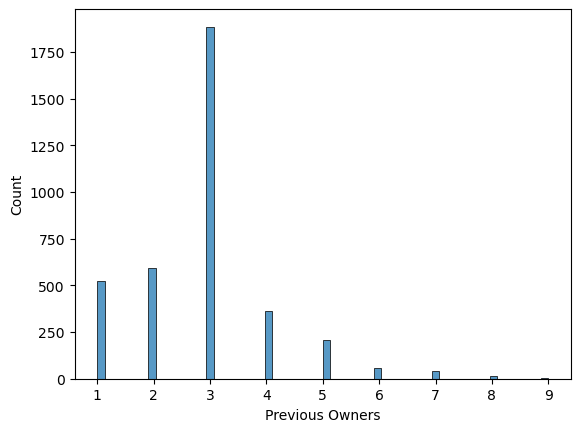

In [364]:
sns.histplot(car_df, x = 'Previous Owners')

In [365]:
car_df['Previous Owners'].fillna('nan')

# car_df['Previous Owners'].isna()

0       3.0
1       4.0
2       3.0
3       5.0
4       3.0
       ... 
3682    4.0
3683    3.0
3684    3.0
3685    3.0
3686    7.0
Name: Previous Owners, Length: 3686, dtype: float64

In [366]:
car_df['Previous Owners'] = car_df['Previous Owners']. fillna(car_df['Previous Owners'].median())

In [367]:
car_df['Previous Owners'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3682    False
3683    False
3684    False
3685    False
3686    False
Name: Previous Owners, Length: 3686, dtype: bool

<Axes: xlabel='Engine', ylabel='Count'>

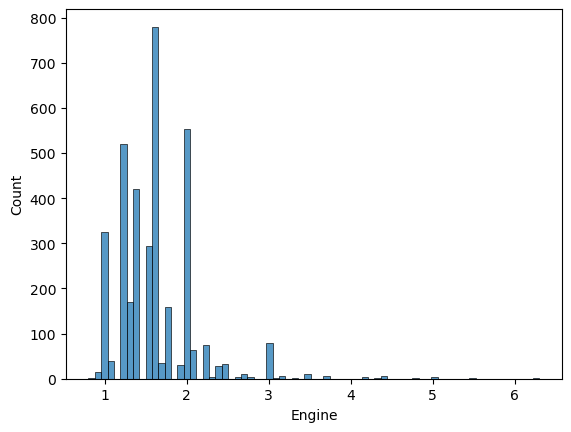

In [368]:
sns.histplot(car_df['Engine'])

In [369]:
cols = ['Previous Owners', 'Engine', 'Doors', 'Seats', 'Emission Class']
car_df[cols] = car_df[cols].fillna(car_df[cols].median(numeric_only=True))

In [370]:
car_df.isna().sum()

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
brand                0
country              0
dtype: int64

In [371]:
backup_df = car_df.copy()

### 이상치 제거

In [372]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3686.000000,3.686000e+03,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000
mean,5786.443028,8.133270e+04,2011.846175,2.881172,1.606186,4.325827,4.901248,4.912100
std,4480.934841,3.942172e+04,5.083076,1.218353,0.483671,0.985055,0.574457,0.900101
min,400.000000,1.000000e+00,1953.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.750000,3.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,6.300000,5.000000,7.000000,6.000000


In [373]:
car_df.sort_values('Price')

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
3245,SEAT IBIZA,400,120842,2010,4.0,Diesel,Hatchback,1.2,Manual,3.0,5.0,5.0,Unknown,SEAT,Spain
3278,VAUXHALL ASTRA,450,115000,2005,3.0,Diesel,Hatchback,1.7,Manual,5.0,5.0,4.0,Unknown,VAUXHALL,United Kingdom
1238,VAUXHALL ASTRA,495,97000,2011,7.0,Diesel,Hatchback,1.7,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom
3246,FORD FIESTA,499,111875,2007,4.0,Petrol,Hatchback,1.4,Manual,3.0,5.0,4.0,Unknown,FORD,United States
3242,RENAULT CLIO,500,138061,2007,5.0,Petrol,Hatchback,1.4,Manual,3.0,5.0,4.0,Unknown,RENAULT,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,LAND ROVER RANGE ROVER SPORT,25995,36363,2015,3.0,Diesel,SUV,3.0,Automatic,5.0,5.0,5.0,Unknown,LAND,United Kingdom
3102,SEAT ATECA,25995,222,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,SEAT,Spain
3224,BMW X3 SERIES,28240,45155,2019,1.0,Diesel,SUV,2.0,Automatic,5.0,5.0,6.0,Unknown,BMW,Germany
2936,LAND ROVER RANGE ROVER SPORT,30000,46000,2017,2.0,Diesel,SUV,2.0,Automatic,5.0,5.0,6.0,Unknown,LAND,United Kingdom


In [374]:
car_df['Price'].sort_values()

3245      400
3278      450
1238      495
3246      499
3242      500
        ...  
3230    25995
3102    25995
3224    28240
2936    30000
3212    33900
Name: Price, Length: 3686, dtype: int64

In [375]:
car_df['Mileage(miles)'].sort_values()

3100          1
3219          1
2013          6
3102        222
2760       1048
         ...   
1946     274100
1933     274100
1283     274100
1478     274100
1037    1110100
Name: Mileage(miles), Length: 3686, dtype: int64

<Axes: xlabel='Mileage(miles)', ylabel='Count'>

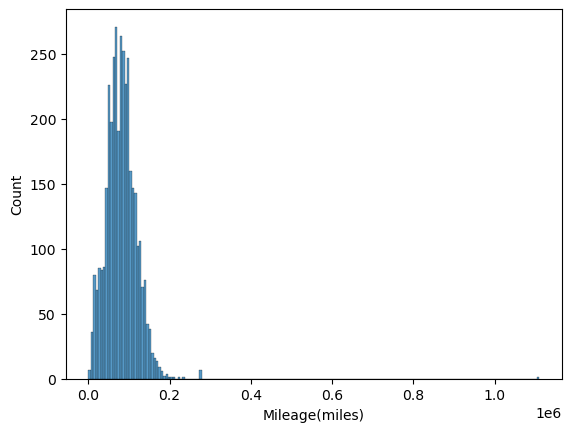

In [376]:
sns.histplot(car_df['Mileage(miles)'])

<Axes: xlabel='Mileage(miles)', ylabel='Count'>

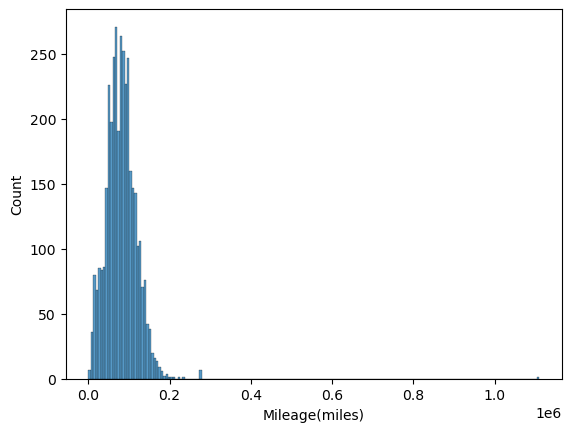

In [377]:
sns.histplot(car_df, x = 'Mileage(miles)')


In [378]:
car_df[car_df['Mileage(miles)'] < 1000]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
2013,MG ZT,15500,6,2004,4.0,Petrol,Saloon,1.8,Manual,4.0,5.0,3.0,Unknown,MG,United Kingdom
3100,MG MG ZS,18365,1,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,MG,United Kingdom
3102,SEAT ATECA,25995,222,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,SEAT,Spain
3219,MG MG ZS,18515,1,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,MG,United Kingdom


In [379]:
car_df = car_df[car_df['Mileage(miles)'] > 1000]

In [380]:
car_df['Registration_Year'].sort_values()

3024    1953
237     1972
2375    1981
1239    1985
1195    1987
        ... 
3191    2022
2967    2023
2760    2023
3173    2023
8       2025
Name: Registration_Year, Length: 3682, dtype: int64

In [381]:
car_df = car_df[car_df['Registration_Year'] < 2025]

In [382]:
car_df['Previous Owners'].unique()

array([3., 4., 5., 1., 2., 6., 7., 9., 8.])

In [383]:
car_df[car_df['Previous Owners'] == 9]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
212,VAUXHALL CORSA,1500,96270,2008,9.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,VAUXHALL,United Kingdom
404,BMW 3 SERIES,2500,138910,2003,9.0,Petrol,Convertible,2.5,Manual,2.0,4.0,3.0,Unknown,BMW,Germany
1314,MINI HATCH,1875,98710,2007,9.0,Petrol,Hatchback,1.6,Manual,3.0,4.0,4.0,Unknown,MINI,United Kingdom
3331,PEUGEOT 207 SW,895,114312,2008,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,PEUGEOT,France
3463,PEUGEOT 207 SW,1450,115000,2009,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,PEUGEOT,France


In [384]:
car_df.groupby('brand')['Price'].agg(['mean', 'std']).reset_index()

,brand,mean,std
0,ABARTH,11216.333333,6039.482621
1,ALFA,3197.388889,2495.694814
2,AUDI,7706.129252,4852.646104
3,BMW,8310.643123,6030.616020
4,CHEVROLET,3331.642857,1306.453191
5,CHRYSLER,2433.800000,796.043152
6,CITROEN,4645.031250,3275.276501
7,DACIA,7439.571429,3647.734338
8,DAEWOO,995.000000,NaN
9,DAIHATSU,1695.000000,282.842712


In [385]:
temp = car_df.groupby(['brand', 'Fuel type'])['Price'].mean().reset_index()
temp

,brand,Fuel type,Price
0,ABARTH,Petrol,11216.333333
1,ALFA,Diesel,4214.666667
2,ALFA,Petrol,2688.750000
3,AUDI,Diesel,8695.809524
4,AUDI,Petrol,6386.555556
...,...,...,...
91,VOLKSWAGEN,Diesel,5466.855556
92,VOLKSWAGEN,Petrol,6984.277778
93,VOLKSWAGEN,Petrol Plug-in Hybrid,11297.500000
94,VOLVO,Diesel,4465.045455


In [386]:
pd.pivot_table(car_df, index = 'brand', columns = 'Fuel type', values = 'Price')

Fuel type,Diesel,Diesel Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid
brand,,,,,,
ABARTH,NaN,NaN,NaN,11216.333333,NaN,NaN
ALFA,4214.666667,NaN,NaN,2688.750000,NaN,NaN
AUDI,8695.809524,NaN,NaN,6386.555556,NaN,NaN
BMW,7342.022222,23220.0,NaN,7032.500000,NaN,19460.652174
CHEVROLET,5249.500000,NaN,NaN,3012.000000,NaN,NaN
CHRYSLER,NaN,NaN,NaN,2433.800000,NaN,NaN
CITROEN,4026.891892,NaN,NaN,5032.677966,NaN,NaN
DACIA,6754.600000,NaN,NaN,7820.111111,NaN,NaN
DAEWOO,NaN,NaN,NaN,995.000000,NaN,NaN


<Axes: xlabel='Previous Owners', ylabel='Price'>

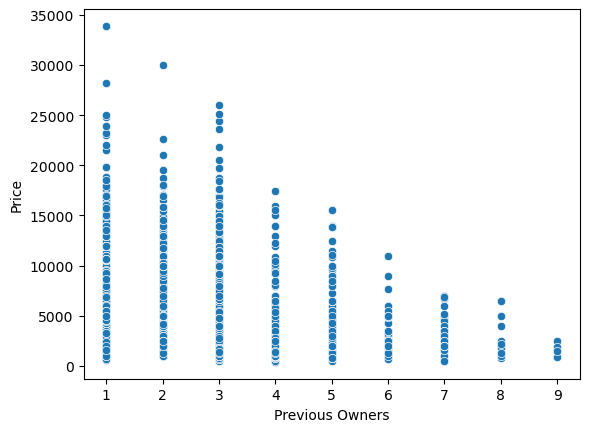

In [387]:
sns.scatterplot( x= car_df['Previous Owners'], y = car_df['Price'])

<Axes: xlabel='Previous Owners', ylabel='Price'>

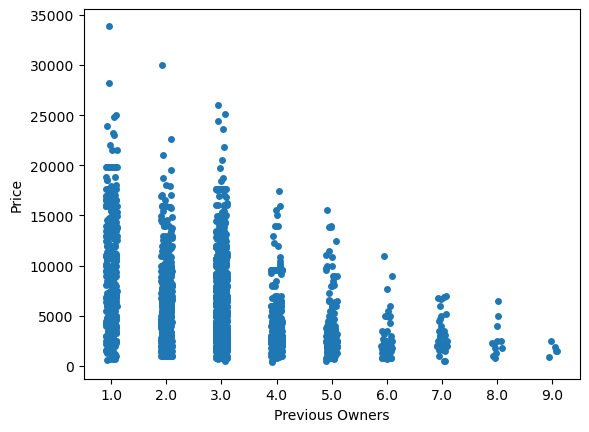

In [388]:
sns.stripplot(x='Previous Owners', y='Price', data=car_df, jitter=True)

<Axes: xlabel='Registration_Year', ylabel='Price'>

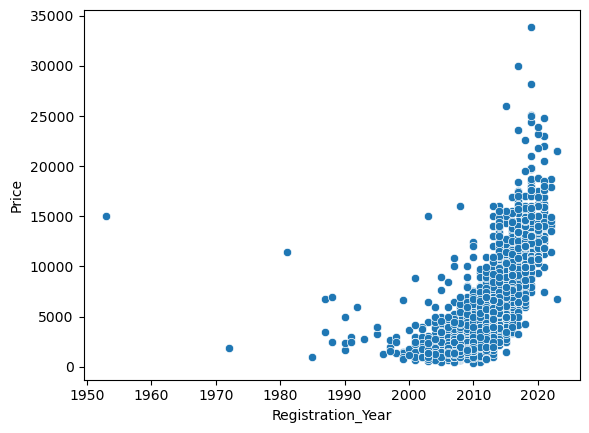

In [389]:
sns.scatterplot( x= car_df['Registration_Year'], y = car_df['Price'])

<Axes: xlabel='Registration_Year', ylabel='Price'>

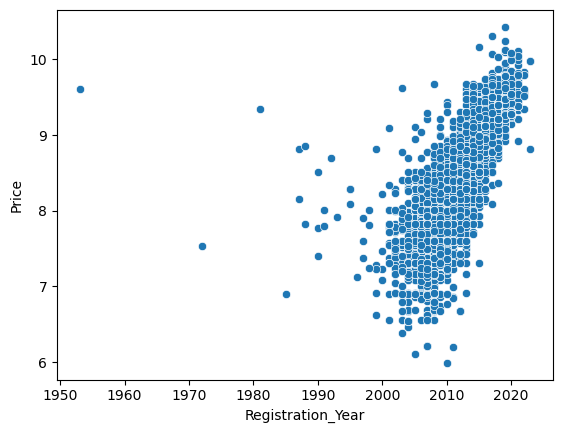

In [390]:
sns.scatterplot(x= car_df['Registration_Year'], y = np.log(car_df['Price']))

In [391]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom


In [392]:
car_df[['title','Fuel type','Body type','Gearbox','Emission Class','Service history','brand','country']].nunique()

title              452
Fuel type            6
Body type           10
Gearbox              2
Emission Class       6
Service history      2
brand               48
country             12
dtype: int64

In [393]:
car_df.drop('title', axis = 1, inplace = True)

In [394]:
# vc = car_df['brand'].value_counts().to_frame(name = 'count')
car_df.value_counts('brand')

brand
VAUXHALL         550
FORD             410
VOLKSWAGEN       272
BMW              269
PEUGEOT          245
TOYOTA           194
NISSAN           180
RENAULT          175
MERCEDES-BENZ    168
AUDI             147
HONDA            108
FIAT             104
MINI              97
CITROEN           96
HYUNDAI           93
KIA               82
SKODA             63
SEAT              59
MAZDA             54
SUZUKI            41
VOLVO             39
LAND              35
MITSUBISHI        33
JAGUAR            30
ALFA              18
DACIA             14
CHEVROLET         14
SUBARU            11
LEXUS              9
JEEP               9
MG                 7
SAAB               7
INFINITI           7
DS                 6
CHRYSLER           5
ROVER              5
SMART              4
ABARTH             3
PROTON             3
PORSCHE            3
MASERATI           3
SSANGYONG          2
DAIHATSU           2
LAGONDA            1
ISUZU              1
DODGE              1
DAEWOO             1
MARCOS 

In [395]:
vc = car_df['brand'].value_counts().to_frame(name = 'count')

In [396]:
avg = car_df.groupby('brand')['Price'].mean().to_frame(name = 'mean_price')

In [397]:
vc.join(avg)

,count,mean_price
brand,,
VAUXHALL,550,4660.638182
FORD,410,4853.365854
VOLKSWAGEN,272,6513.904412
BMW,269,8310.643123
PEUGEOT,245,5463.955102
TOYOTA,194,5293.974227
NISSAN,180,6503.533333
RENAULT,175,5623.371429
MERCEDES-BENZ,168,7703.041667


In [398]:
car_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom


In [399]:
car_df = pd.get_dummies(car_df, dtype = int, drop_first = True)

car_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Electric,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,3.0,1.4,5.0,5.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1495,88585,2008,4.0,1.2,3.0,5.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,949,137000,2011,3.0,1.4,5.0,5.0,5.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2395,96731,2010,5.0,1.4,3.0,4.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1000,85000,2013,3.0,1.3,5.0,5.0,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,1395,76202,2006,4.0,1.6,5.0,5.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3683,6990,119000,2012,3.0,2.0,4.0,5.0,5.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3684,3995,139000,2013,3.0,2.0,4.0,5.0,5.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3685,1390,179190,2007,3.0,2.2,5.0,5.0,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [400]:
from sklearn.preprocessing import RobustScaler

In [401]:
rs = RobustScaler()

In [402]:
car_df = pd.DataFrame(rs.fit_transform(car_df), columns = car_df.columns)

In [403]:
from sklearn.decomposition import PCA

In [404]:
pca = PCA(5)

In [405]:
pd.DataFrame(pca.fit_transform(car_df))

,0,1,2,3,4
0,-0.513758,-0.426552,0.411788,0.648944,0.286389
1,1.313753,-1.214371,-0.358071,-0.268822,-0.151345
2,0.812218,-0.216585,-1.008649,0.656695,0.659393
3,1.963961,-1.315186,0.507587,-0.705228,0.555717
4,0.268251,-0.649850,-0.519523,0.556974,-0.119635
...,...,...,...,...,...
3676,1.429107,-0.806166,-0.193197,0.089554,-0.566235
3677,0.435035,1.079264,0.291360,-0.139053,0.551059
3678,0.756214,1.455695,0.093592,0.234988,0.865434
3679,1.657000,1.691090,-0.992556,0.813126,0.402815


In [406]:
pca.explained_variance_ratio_

array([0.28070492, 0.12998063, 0.10789184, 0.06877154, 0.05229293])

In [407]:
for i in range(2, 11):
    pca = PCA(i)
    pca.fit(car_df)
    print(i, round(pca.explained_variance_ratio_.sum(), 2))

2 0.41
3 0.52
4 0.59
5 0.64
6 0.68
7 0.71
8 0.74
9 0.77
10 0.79


In [408]:
pca = PCA(7)

In [409]:
pd.DataFrame(pca.fit_transform(car_df), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7'])


# pd.DataFrame(
#     pca.fit_transform(car_df),
#     columns=[f'PC{i+1}' for i in range(car_df.shape[1])]
# )

# pd.DataFrame(
#     pca.transform(car_df),
#     columns=[f'PC{i+1}' for i in range(pca.n_components_)]
# )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.513758,-0.426552,0.411788,0.648944,0.286389,0.032311,0.016317
1,1.313753,-1.214371,-0.358071,-0.268822,-0.151345,0.999291,-0.056803
2,0.812218,-0.216585,-1.008649,0.656695,0.659393,0.045657,-0.083680
3,1.963961,-1.315186,0.507587,-0.705228,0.555717,0.641595,-0.139573
4,0.268251,-0.649850,-0.519523,0.556974,-0.119635,1.164612,-0.173187
...,...,...,...,...,...,...,...
3676,1.429107,-0.806166,-0.193197,0.089554,-0.566235,-0.423378,0.011994
3677,0.435035,1.079264,0.291360,-0.139053,0.551059,-0.037321,0.105704
3678,0.756214,1.455695,0.093592,0.234988,0.865434,0.082012,-0.046352
3679,1.657000,1.691090,-0.992556,0.813126,0.402815,-0.057667,-0.784209


In [414]:
backup_df.groupby(['country', 'brand']).count()

title  Price  Mileage(miles)  Registration_Year  \
country        brand                                                            
Czech Republic SKODA             63     63              63                 63   
France         CITROEN           96     96              96                 96   
               DS                 6      6               6                  6   
               PEUGEOT          245    245             245                245   
               RENAULT          175    175             175                175   
Germany        AUDI             147    147             147                147   
               BMW              269    269             269                269   
               MERCEDES-BENZ    168    168             168                168   
               PORSCHE            3      3               3                  3   
               SMART              4      4               4                  4   
               VOLKSWAGEN       272    272             272                272   
Italy          ABARTH             3      3               3                  3   
               ALFA              18     18              18                 18   
               FIAT             104    104             104                104   
               MASERATI           3      3               3                  3   
Japan          DAIHATSU           2      2               2                  2   
               HONDA            108    108             108                108   
               INFINITI           7      7               7                  7   
               ISUZU              1      1               1                  1   
               LEXUS              9      9               9                  9   
               MAZDA             54     54              54                 54   
               MITSUBISHI        33     33              33                 33   
               NISSAN           180    180             180                180   
               SUBARU            11     11              11                 11   
               SUZUKI            41     41              41                 41   
               TOYOTA           194    194             194                194   
Malaysia       PROTON             3      3               3                  3   
Romania        DACIA             14     14              14                 14   
South Korea    DAEWOO             1      1               1                  1   
               HYUNDAI           93     93              93                 93   
               KIA               82     82              82                 82   
               SSANGYONG          2      2               2                  2   
Spain          SEAT              60     60              60                 60   
Sweden         SAAB               7      7               7                  7   
               VOLVO             40     40              40                 40   
United Kingdom JAGUAR            30     30              30                 30   
               LAGONDA            1      1               1                  1   
               LAND              35     35              35                 35   
               MARCOS             1      1               1                  1   
               MG                10     10              10                 10   
               MINI              97     97              97                 97   
               ROVER              5      5               5                  5   
               VAUXHALL         550    550             550                550   
United States  CHEVROLET         14     14              14                 14   
               CHRYSLER           5      5               5                  5   
               DODGE              1      1               1                  1   
               FORD             410    410             410                410   
               JEEP               9      9               9   

In [417]:
backup_df.corr

<bound method DataFrame.corr of                title  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type  Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback     1.4  Manual    5.0    5.0   
1                 4.0  